In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

In [16]:
# import wine-reviews.csv
df = pd.read_csv('wine-reviews.csv', usecols= ['country', 'description', 'points', 'price', 'variety', 'winery'])
df.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [17]:
df = df.dropna(subset=['description', 'points'])
df.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

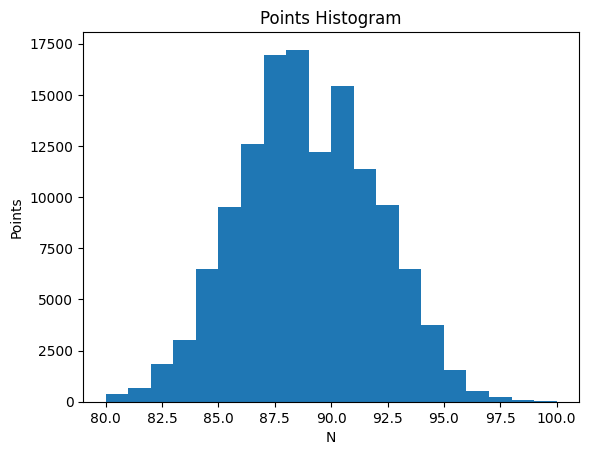

In [18]:
plt.hist(df.points, bins=20)
plt.title("Points Histogram")
plt.xlabel("N")
plt.ylabel("Points")
plt.show()

In [19]:
df['label'] = (df.points >= 90).astype(int)
df = df[['description', 'label']]
df.head()
# df.tail()

description  label
0  Aromas include tropical fruit, broom, brimston...      0
1  This is ripe and fruity, a wine that is smooth...      0
2  Tart and snappy, the flavors of lime flesh and...      0
3  Pineapple rind, lemon pith and orange blossom ...      0
4  Much like the regular bottling from 2012, this...      0

In [20]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

c:\Users\kvele\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop('label')
    df = df['description']
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return

In [22]:
train_data = df_to_dataset(train)
val_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(list(train_data)[0][0])

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

In [ ]:
model.evaluate(val_data)

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=10)